# Spam Email Analysis with Machine Learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [2]:
spam = pd.read_csv('spam.csv') # data set read

In [3]:
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
spam.shape

(5572, 2)

In [5]:
spam.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
spam.groupby(spam['Category']).size()

Category
ham     4825
spam     747
dtype: int64

We have a total of 5572 data. There are %83 safe and %17 spam.

In [7]:
spam.Category = spam.Category.apply(lambda x: 1 if x == 'spam' else 0) 

We changed the spam values in the Category column with 1 and the raw values with 0.

In [8]:
spam.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages = spam.iloc[:,1] # Messages column

In [10]:
messages.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [11]:
ifSpam = spam.iloc[:,0] # Spam column

In [12]:
ifSpam.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int64

In [13]:
messages_train, messages_test, ifSpam_train, ifSpam_test = train_test_split(messages, ifSpam, test_size=0.25)

We will use 75% of our dataset for training and 25% for testing 

In [14]:
cv = CountVectorizer()

With CountVectorizer, text is analyzed and word counts are made and these are converted into vectors.

In [15]:
features = cv.fit_transform(messages_train)

In [16]:
features_test = cv.transform(messages_test)

# Learning and Predicts 

In [17]:
knModel = KNeighborsClassifier(n_neighbors=1)

In [18]:
knModel.fit(features, ifSpam_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
knPredict = knModel.predict(features_test)

In [20]:
dtModel = tree.DecisionTreeClassifier() 

In [21]:
dtModel.fit(features, ifSpam_train)

DecisionTreeClassifier()

In [22]:
dtPredict = dtModel.predict(features_test)

# Visualization

In [29]:
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [30]:
def visualization(model):
    predict = model.predict(features_test)
    plot_confusion_matrix(model,features_test,ifSpam_test)
    plot_precision_recall_curve(model,features_test,ifSpam_test)
    plot_roc_curve(model,features_test,ifSpam_test)

# Results

### K-Nearest Neighbors 

In [31]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != knPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 85


In [32]:
successRate = 100.0 * f1_score(ifSpam_test, knPredict, average='micro')

In [33]:
print("The Success Rate was calculated as % : " + str(successRate) + " with the K-Nearest-Neighbors")

The Success Rate was calculated as % : 93.89806173725772 with the K-Nearest-Neighbors


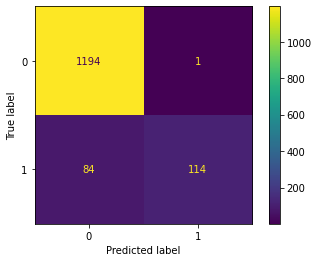

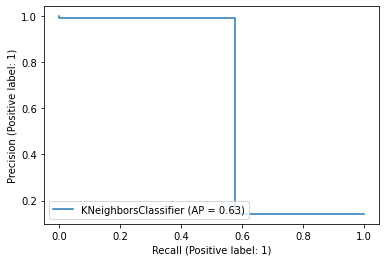

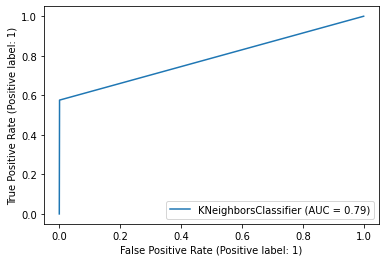

In [34]:
visualization(knModel)

### Decision Tree

In [39]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != dtPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 45


In [40]:
successRate = 100.0 * f1_score(ifSpam_test, dtPredict, average='micro')

In [41]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Decision Tree")

The Success Rate was calculated as % : 96.76956209619526 with Decision Tree


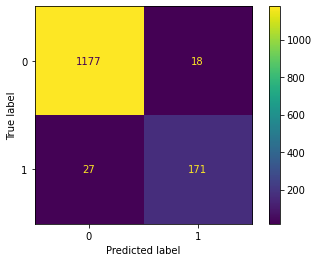

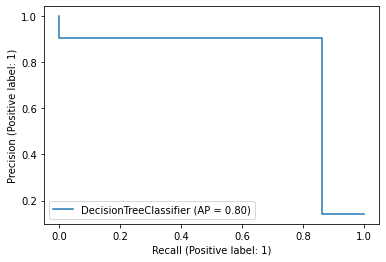

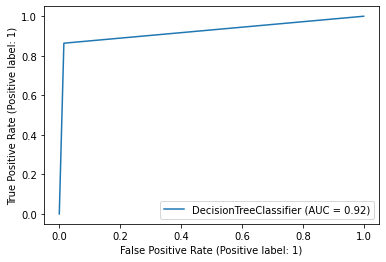

In [42]:
visualization(dtModel)